In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from Selection import embedded_method as em
from sklearn.feature_selection import SelectFromModel

In [2]:
# load data
train = pd.read_csv("Data/power-data/save_data/train_process.csv")
test = pd.read_csv("Data/power-data/save_data/test_process.csv")

In [3]:
train = train.drop(['Unnamed: 0'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)

In [4]:
train.head()

,turbine_status_impute_mode,cloud_level_impute_mode,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),atmospheric_temperature(°K),mat_do_khi_quyen
0,2,2,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,20.767246,239.836388,2730.310605,42.084666,2.217542,0.314065,24.281689,6.766521,174.000000,2.070208
1,3,2,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,20.767246,337.944723,1780.207200,107.888643,4.210346,0.448494,27.262139,5.966275,300.764785,0.197261
2,1,2,95.484724,0.371184,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,2.719475,0.302321,27.366127,2.874342,273.371184,0.205495
3,1,1,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,4.857385,0.367140,24.287767,14.851089,174.000000,0.374183
4,6,2,10.722890,0.371184,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,2.248762,0.453374,27.971650,3.519074,273.371184,1.458688


In [5]:
train.shape

(27993, 22)

In [6]:
X = train.drop(['windmill_generated_power(kW/h)'], axis=1)
y = train['windmill_generated_power(kW/h)']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection 

Sử dụng thư viện sklearn

In [8]:
from sklearn.feature_selection import f_regression

In [9]:
univariate = f_regression(X_train, y_train)
univariate

(array([1.59452570e+00, 4.60562124e-02, 8.07409764e+01, 6.53911298e-01,
        3.53010693e+01, 5.22919551e+02, 6.74874951e+01, 1.78101869e+03,
        7.45475304e+03, 3.99677616e+03, 4.67581915e+00, 4.04902192e+03,
        1.27869267e+00, 2.53817868e+03, 1.37516893e+03, 7.47124274e+02,
        3.03326115e+00, 1.65192689e+02, 1.92831756e-01, 6.53911298e-01,
        4.92112371e+00]),
 array([2.06693877e-001, 8.30075603e-001, 2.77205699e-019, 4.18726341e-001,
        2.86653409e-009, 2.00424069e-114, 2.23399057e-016, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 3.06006649e-002, 0.00000000e+000,
        2.58154363e-001, 0.00000000e+000, 3.48149994e-292, 7.64947668e-162,
        8.15876396e-002, 1.12843921e-037, 6.60574385e-001, 4.18726341e-001,
        2.65402476e-002]))

In [10]:
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)

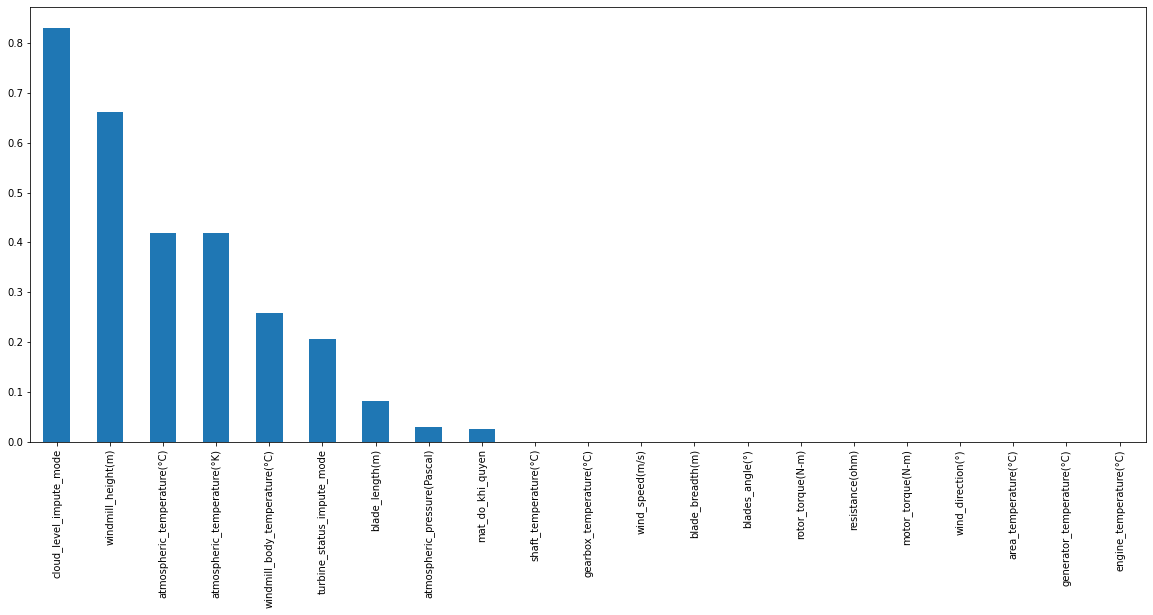

In [11]:
univariate.sort_values(ascending=False).plot.bar(figsize=(20,8))

 Sử dụng thuật toán DecisionTreeRegression

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [16]:
mse_values = []
for feature in X_train.columns:
    clf = DecisionTreeRegressor(max_depth=10)
    clf.fit(X_train[feature].to_frame(), y_train)
    y_scored = clf.predict(X_test[feature].to_frame())
    mse_values.append(mean_squared_error(y_test, y_scored))

In [17]:
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=True)

motor_torque(N-m)                1.034074
generator_temperature(°C)        1.449595
resistance(ohm)                  1.464183
rotor_torque(N-m)                2.653278
atmospheric_pressure(Pascal)     4.041549
blades_angle(°)                  4.506750
engine_temperature(°C)           4.819021
mat_do_khi_quyen                 4.947089
gearbox_temperature(°C)          4.947604
wind_direction(°)                5.678925
shaft_temperature(°C)            5.962333
wind_speed(m/s)                  5.993378
area_temperature(°C)             6.218831
blade_breadth(m)                 6.868703
cloud_level_impute_mode          7.082981
turbine_status_impute_mode       7.093568
blade_length(m)                  7.161737
atmospheric_temperature(°C)      7.231307
atmospheric_temperature(°K)      7.231325
windmill_body_temperature(°C)    7.344652
windmill_height(m)               7.362305
dtype: float64

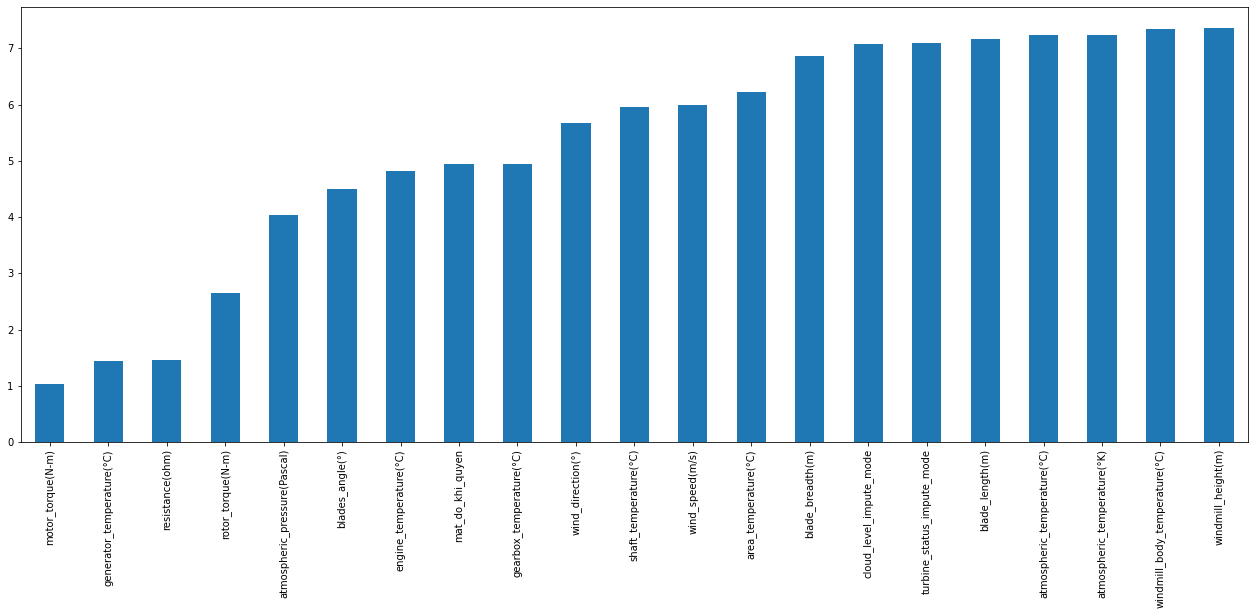

In [18]:
mse_values.sort_values(ascending=True).plot.bar(figsize=(22, 8))